In [ ]:
Answer 1

In [ ]:
The states that have exceptionally high or low average immunization rates are listed as outliers.
A graphic that highlights notable shifts in the daily overall vaccination rate in the United States.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load your dataset
vaccination_data = pd.read_csv('us_state_vaccinations.csv')

# Convert 'date' to datetime type
vaccination_data['date'] = pd.to_datetime(vaccination_data['date'])

In [4]:
# Calculate the mean and standard deviation for total vaccinations per hundred by state
state_mean = vaccination_data.groupby('location')['total_vaccinations_per_hundred'].mean()
state_std = vaccination_data.groupby('location')['total_vaccinations_per_hundred'].std()

In [5]:
# Define outliers as those states whose mean vaccination rate is more than 2 standard deviations from the national mean
national_mean = state_mean.mean()
national_std = state_mean.std()
outliers = state_mean[(state_mean > national_mean + 2 * national_std) | (state_mean < national_mean - 2 * national_std)]

In [6]:
# Identify dates with significant changes in daily vaccinations
daily_changes = vaccination_data.groupby('date')['daily_vaccinations'].sum().diff()
change_mean = daily_changes.mean()
change_std = daily_changes.std()

In [7]:
# Significant changes are those where the daily change is more than 2 standard deviations from the mean
significant_changes = daily_changes[(daily_changes > change_mean + 2 * change_std) | (daily_changes < change_mean - 2 * change_std)]

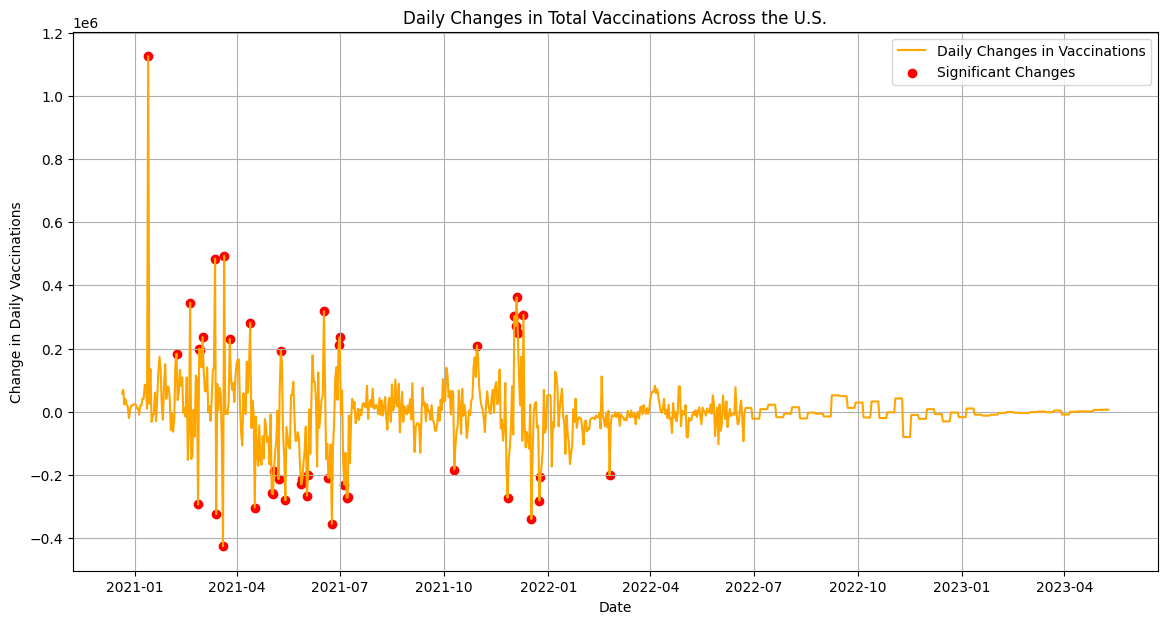

Outlier States based on Total Vaccinations per Hundred:
location
Marshall Islands      62.908827
Republic of Palau    158.801085
Name: total_vaccinations_per_hundred, dtype: float64


In [8]:
# Plotting the significant changes
plt.figure(figsize=(14, 7))
plt.plot(daily_changes.index, daily_changes, label='Daily Changes in Vaccinations', color='orange')
plt.scatter(significant_changes.index, significant_changes, color='red', label='Significant Changes')
plt.title('Daily Changes in Total Vaccinations Across the U.S.')
plt.xlabel('Date')
plt.ylabel('Change in Daily Vaccinations')
plt.legend()
plt.grid(True)
plt.show()

# Print the outlier states
print("Outlier States based on Total Vaccinations per Hundred:")
print(outliers)

In [ ]:
The code sample provided is analyzing the COVID-19 vaccination data in the United States. It focuses on two primary areas:

1. Identifying States That Are Outliers: Finding states with average vaccination rates (total vaccinations per hundred persons) that differ 
noticeably from the national average is the goal of this section of the analysis. States are deemed to be outliers if their immunization rates 
deviate by more than two standard deviations from the average rate for all states. These anomalies might be states where the introduction of 
vaccines has been especially successful or unsuccessful, owing to variations in public opinion, healthcare infrastructure, or legislation.

2. Analyzing Notable Shifts in Routine Immunizations: This section examines the daily fluctuations in the overall number of vaccines to spot 
any notable increases or decreases. Notable alterations are identified as variations that depart from the average daily change by more than two 
standard deviations. These notable modifications may be brought about by particular occurrences or policy shifts, such as the introduction of fresh 
vaccine batches, adjustments to vaccination eligibility, or public health alerts.
